In [2]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns

## Gathering Data

In [3]:
#1.Twitter Archive csv reinladen
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
#2. Image Prediction with Request
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
#3.Twitter API datei runterladen


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [5]:
#comment out to run the file

#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
#Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
       list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 690
Rate limit reached. Sleeping for: 687


In [6]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [7]:
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [8]:
#Write API list into txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [5]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweets_json
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
            
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'retweeted_status', 'url'])
                             
                            

## Assess

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1809,676864501615042560,NaN,NaN,2015-12-15 20:40:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None


In [8]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True
813,692535307825213440,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1,pug,0.413090,True,French_bulldog,0.199865,True,Chihuahua,0.081991,True


In [9]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
retweeted_status    2331 non-null object
url                 0 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 109.4+ KB


In [11]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,retweeted_status,url
96,873213775632977920,6697,1446,8809873,Original tweet,NaN
509,808838249661788160,10229,3076,8809881,Original tweet,NaN
2024,671504605491109889,6666,3363,8809934,Original tweet,NaN
1744,678380236862578688,2386,887,8809907,Original tweet,NaN
1657,681981167097122816,2780,1018,8809907,Original tweet,NaN
549,802239329049477120,9193,2661,8809881,Original tweet,NaN
1284,707297311098011648,2733,770,8809908,Original tweet,NaN
1499,690607260360429569,293,18,8809906,Original tweet,NaN
1117,727644517743104000,5783,1716,8810555,Original tweet,NaN
1866,674764817387900928,764,228,8809934,Original tweet,NaN


In [12]:
tweet_json.retweeted_status.unique()

array(['Original tweet', 'This is a retweet'], dtype=object)

In [13]:
#Double pictures URL?
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                2
                                                              ..
https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg                1
https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg                1
https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg                1
https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg                1
https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg                1
Name: jpg_url, Length: 2009, dtype: int64

In [14]:
#Amount of dublicated URLs
len(image_prediction.jpg_url) - image_prediction.jpg_url.nunique()

66

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
with pd.option_context('max_colwidth', 300):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Quality
##### `twitter_archive`
 - There are original ratings and retweets
 - Delete columns that won't be used for analysis
 - dog stages are not correct
 - timestamp is not a datetime 
 - missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
 - Rating denominator is getting higher than 10
 - Numerator as float only gets the value after period 
 - Result of the Rating should have a column in float
 - Sometimes Name of the dog is None
 
 ##### `image_prediction`
 - p1, p2, p3 dog races are sometimes capital letter sometimes small letter
 - p1, p2 and p3 columns have invalid data...like a birdhouse, can_opener, or breastplate etc.
 
 ##### `tweet_json`
 - tweet_id is a string not a int
 - missing data for the tweet_ids
 - Retweets in this df

#### Tidiness

##### `twitter_archive`
 - dog stages are in 4 columns
 
##### `image_prediction`
 - needs to be included into one big dataframe
 
##### `tweet_json`
 - needs to be included into one big dataframe

## Clean

#### Quality
1. Keep original ratings (no retweets) that have images
2. Delete Columns in `tweet_archive` 'source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
3. Convert timestamp as date in `tweet_archive` 
4. Convert `tweet_json` tweet_id into int
5. Fix Numerator in `tweet_archive`
6. Delete all rows in `tweet_archive`, which have a denominator which is not 10
7. Dog races all small letters in `image_predictions`
8. Delete 66 duplicated rows with picture in `image_predictions`
9. Delete Retweets in `tweet_json`
#### Tidiness
1. Dog Stages in `twitter_archive` needs to be one column
2. Creating one dataframe out of the three dfs called `df`

In [202]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

**1. Keep original ratings (no retweets) that have images**

In [203]:
#Code
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

In [204]:
#Test
sum(twitter_archive_clean.retweeted_status_id.value_counts())

0

**2.Delete Columns in tweet_archive 'source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'**

In [205]:
#Code
twitter_archive_clean = twitter_archive_clean.drop(['source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

In [206]:
#Test
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


**3.Convert timestamp as date in tweet_archive**

In [207]:
#Code
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [208]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


**4.Convert tweet_json tweet_id into int**

In [209]:
#Code
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_prediction.tweet_id = image_prediction.tweet_id.astype(str)

In [210]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 186.9+ KB


**5. Fix Numerator in tweet_archive**

In [211]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 186.9+ KB


In [212]:
#Code
twitter_archive_clean[["rating_numerator","rating_denominator"]] = twitter_archive_clean[["rating_numerator","rating_denominator"]].astype(float)
twitter_archive_clean.info()

#Manual Update numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 186.9+ KB


In [213]:
#Test
with pd.option_context('max_colwidth', 300):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


**6. Delete all rows in tweet_archive, which have a denominator which is not 10**

In [214]:
len(twitter_archive_clean[twitter_archive_clean["rating_denominator"] != 10])

22

In [215]:
#code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

In [216]:
#Test
len(twitter_archive_clean[twitter_archive_clean["rating_denominator"] != 10])

0

**7. Dog races all small letters in image_predictions**

In [217]:
#Code
image_prediction_clean.p1 =image_prediction_clean.p1.str.lower()
image_prediction_clean.p2 =image_prediction_clean.p2.str.lower()
image_prediction_clean.p3 =image_prediction_clean.p3.str.lower()

In [218]:
#Test
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True
1940,860924035999428608,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
469,675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
1142,729854734790754305,https://pbs.twimg.com/media/CiD3AfkXEAA3S_r.jpg,1,doormat,0.359586,False,china_cabinet,0.053901,False,passenger_car,0.052665,False


**8. Delete 66 duplicated rows with picture in image_predictions**

In [219]:
#Code
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [220]:
#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

**9. Delete Retweets in tweet_json**

In [221]:
#Code
tweet_json_clean = tweet_json_clean[tweet_json_clean["retweeted_status"]=="Original tweet"]

In [222]:
#Test
tweet_json_clean.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

**10. Dog Stages in twitter_archive needs to be one column**

In [223]:
twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in the #ScienceMa...,13.0,10.0,None,doggo,None,None,puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11.0,10.0,None,doggo,floofer,None,None
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13.0,10.0,Dido,doggo,None,pupper,None
531,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12.0,10.0,None,doggo,None,pupper,None
565,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version 2. Both 11/10 ...",11.0,10.0,None,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12.0,10.0,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,10.0,10.0,Pinot,doggo,None,pupper,None
733,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0,10.0,None,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10.0,Maggie,doggo,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,5.0,10.0,None,doggo,None,pupper,None


In [224]:
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [225]:
with pd.option_context('max_colwidth', 300):
    display(twitter_archive_clean[twitter_archive_clean["tweet_id"]=="892420643555336193"].text)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
Name: text, dtype: object

In [226]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2153 non-null object
timestamp             2153 non-null datetime64[ns, UTC]
text                  2153 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non-null float64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 185.0+ KB


In [227]:
twitter_archive_clean["doggo"] = twitter_archive_clean["doggo"].replace("None", np.NaN)
twitter_archive_clean["floofer"] = twitter_archive_clean["floofer"].replace("None", np.NaN)
twitter_archive_clean["pupper"] = twitter_archive_clean["pupper"].replace("None", np.NaN)
twitter_archive_clean["puppo"] = twitter_archive_clean["puppo"].replace("None", np.NaN)

In [228]:
twitter_archive_clean.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10.0,None,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN


In [229]:
#Versuch 1 Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_archive_clean['dogs_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean[['dogs_stage','doggo', 'floofer', 'pupper', 'puppo']].head(20)

,dogs_stage,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,doggo,doggo,NaN,NaN,NaN


In [230]:
twitter_archive_clean = twitter_archive_clean.drop(["doggo","floofer","pupper","puppo"], axis=1)
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN


In [231]:
twitter_archive_clean.dogs_stage.value_counts()

pupper     238
doggo       83
puppo       32
floofer      4
Name: dogs_stage, dtype: int64

In [232]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
#twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
#                                                                'timestamp',
#                                                               'text',
#                                                               'rating_numerator',
#                                                               'rating_denominator',
#                                                               'name'],
#                               var_name='dogs', value_name='dogs_stage')

In [233]:
#CODE: drop dogs
#twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
#twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
#                                                                                        keep='last')

In [234]:
#Test
twitter_archive_clean.dogs_stage.value_counts()

pupper     238
doggo       83
puppo       32
floofer      4
Name: dogs_stage, dtype: int64

**11. Creating one dataframe out of the three dfs twitter_archive_master**

In [235]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_merge1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_merge1 = df_merge1[df_merge1['jpg_url'].notnull()]

In [236]:
#TEST
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2152
Data columns (total 18 columns):
tweet_id              1910 non-null object
timestamp             1910 non-null datetime64[ns, UTC]
text                  1910 non-null object
rating_numerator      1910 non-null float64
rating_denominator    1910 non-null float64
name                  1910 non-null object
dogs_stage            310 non-null object
jpg_url               1910 non-null object
img_num               1910 non-null float64
p1                    1910 non-null object
p1_conf               1910 non-null float64
p1_dog                1910 non-null object
p2                    1910 non-null object
p2_conf               1910 non-null float64
p2_dog                1910 non-null object
p3                    1910 non-null object
p3_conf               1910 non-null float64
p3_dog                1910 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), object(11)
memory usage: 283.5+ KB


In [237]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df = pd.merge(df_merge1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 23 columns):
tweet_id              1910 non-null object
timestamp             1910 non-null datetime64[ns, UTC]
text                  1910 non-null object
rating_numerator      1910 non-null float64
rating_denominator    1910 non-null float64
name                  1910 non-null object
dogs_stage            310 non-null object
jpg_url               1910 non-null object
img_num               1910 non-null float64
p1                    1910 non-null object
p1_conf               1910 non-null float64
p1_dog                1910 non-null object
p2                    1910 non-null object
p2_conf               1910 non-null float64
p2_dog                1910 non-null object
p3                    1910 non-null object
p3_conf               1910 non-null float64
p3_dog                1910 non-null object
favorite_count        1904 non-null float64
retweet_count         1904 non-null float64
followers_cou

In [238]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,0.085851,False,banana,0.076110,False,35903.0,7617.0,8809873.0,Original tweet,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,...,0.090647,True,papillon,0.068957,True,30974.0,5641.0,8809873.0,Original tweet,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,...,0.078253,True,kelpie,0.031379,True,23311.0,3733.0,8809873.0,Original tweet,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,0.168086,True,spatula,0.040836,False,39186.0,7787.0,8809873.0,Original tweet,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,0.225770,True,german_short-haired_pointer,0.175219,True,37443.0,8389.0,8809873.0,Original tweet,NaN


In [239]:
df = df[df['retweet_count'].notnull()]
df = df.drop("url", axis =1)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 0 to 1909
Data columns (total 22 columns):
tweet_id              1904 non-null object
timestamp             1904 non-null datetime64[ns, UTC]
text                  1904 non-null object
rating_numerator      1904 non-null float64
rating_denominator    1904 non-null float64
name                  1904 non-null object
dogs_stage            309 non-null object
jpg_url               1904 non-null object
img_num               1904 non-null float64
p1                    1904 non-null object
p1_conf               1904 non-null float64
p1_dog                1904 non-null object
p2                    1904 non-null object
p2_conf               1904 non-null float64
p2_dog                1904 non-null object
p3                    1904 non-null object
p3_conf               1904 non-null float64
p3_dog                1904 non-null object
favorite_count        1904 non-null float64
retweet_count         1904 non-null float64
followers_cou

In [241]:
df.rating_numerator.sort_values(ascending=False)

681     1776.0
1638     420.0
476       75.0
519       27.0
1304      26.0
         ...  
1442       1.0
1892       1.0
1818       1.0
711        0.0
233        0.0
Name: rating_numerator, Length: 1904, dtype: float64

In [242]:
df.drop(681, inplace = True)

In [243]:
df.rating_numerator.sort_values(ascending=False)

1638    420.0
476      75.0
519      27.0
1304     26.0
251      14.0
        ...  
1892      1.0
1442      1.0
1655      1.0
711       0.0
233       0.0
Name: rating_numerator, Length: 1903, dtype: float64

In [244]:
df.drop(1638, inplace = True)
df.rating_numerator.sort_values(ascending=False)

476     75.0
519     27.0
1304    26.0
515     14.0
307     14.0
        ... 
1892     1.0
1818     1.0
1442     1.0
711      0.0
233      0.0
Name: rating_numerator, Length: 1902, dtype: float64

In [254]:
df.drop(476, inplace = True)
df.drop(519, inplace = True)
df.drop(1304, inplace = True)

In [255]:
#Storing the new twitter_dogs df to a new csv file
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Storing, Analyzing, and Visualizing Data

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1909
Data columns (total 22 columns):
tweet_id              1899 non-null object
timestamp             1899 non-null datetime64[ns, UTC]
text                  1899 non-null object
rating_numerator      1899 non-null float64
rating_denominator    1899 non-null float64
name                  1899 non-null object
dogs_stage            308 non-null object
jpg_url               1899 non-null object
img_num               1899 non-null float64
p1                    1899 non-null object
p1_conf               1899 non-null float64
p1_dog                1899 non-null object
p2                    1899 non-null object
p2_conf               1899 non-null float64
p2_dog                1899 non-null object
p3                    1899 non-null object
p3_conf               1899 non-null float64
p3_dog                1899 non-null object
favorite_count        1899 non-null float64
retweet_count         1899 non-null float64
followers_cou

In [257]:
dog_stages = df.groupby("dogs_stage")
dog_stages.describe()

rating_numerator                                               \
                      count       mean       std   min   25%   50%   75%   
dogs_stage                                                                 
doggo                  68.0  11.602941  1.676347   5.0  11.0  12.0  13.0   
floofer                 3.0  12.666667  0.577350  12.0  12.5  13.0  13.0   
pupper                211.0  10.526066  1.834337   3.0  10.0  11.0  12.0   
puppo                  26.0  12.115385  1.243444   9.0  12.0  12.5  13.0   

                 rating_denominator        ... retweet_count           \
             max              count  mean  ...           75%      max   
dogs_stage                                 ...                          
doggo       14.0               68.0  10.0  ...       3914.25  76909.0   
floofer     13.0                3.0  10.0  ...       9637.50  15936.0   
pupper      14.0              211.0  10.0  ...       1959.00  32619.0   
puppo       14.0               26.0  10.0  ...       6957.50  43367.0   

           followers_count                                                   \
                     count          mean         std        min         25%   
dogs_stage                                                                    
doggo                 68.0  8.809905e+06  112.166473  8809873.0  8809876.75   
floofer                3.0  8.809878e+06    4.618802  8809873.0  8809877.00   
pupper               211.0  8.809917e+06   80.884014  8809873.0  8809906.00   
puppo                 26.0  8.809908e+06  126.230589  8809873.0  8809874.00   

                                             
                  50%        75%        max  
dogs_stage                                   
doggo       8809881.0  8809904.0  8810555.0  
floofer     8809881.0  8809881.0  8809881.0  
pupper      8809907.0  8809908.0  8810583.0  
puppo       8809879.0  8809898.5  8810524.0  

[4 rows x 72 columns]

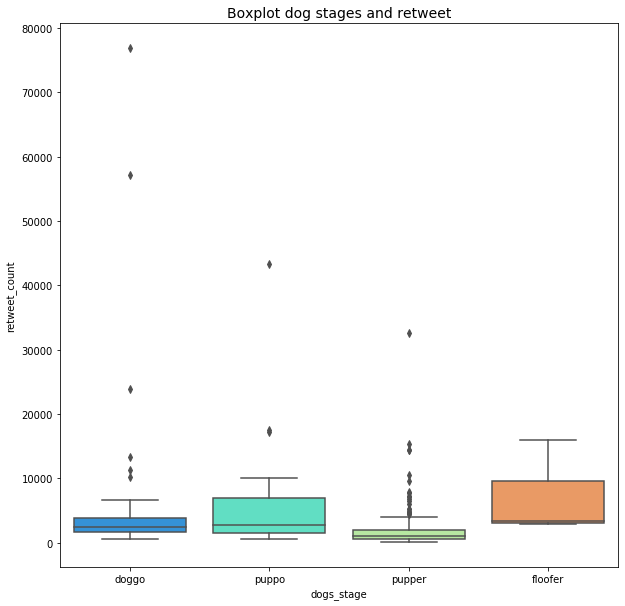

In [258]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dogs_stage',y='retweet_count',data= df,palette='rainbow')
g.axes.set_title('Boxplot dog stages and retweet', fontsize=14);

Doggo stages has huge outliers, there needs to be more investigation to see why this happens at the doggo stages, besides that puppos have on average the most retweets followed by doggo and floofer

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


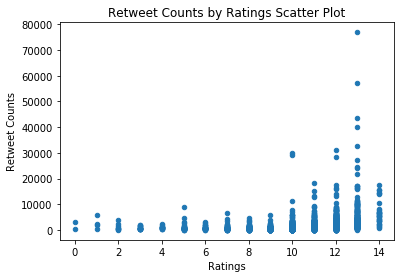

In [259]:
df.plot(y='retweet_count', x='rating_numerator', kind='scatter')
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()

As seen here, the better the rating the more retweets happened the most retweets happend between 12-14

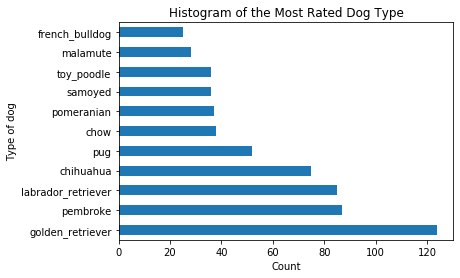

In [260]:
df_dog_type = df.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_type['p1'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [261]:
dog_types_count = df_dog_type.p1.value_counts()
dog_types_avg_rating = df_dog_type.groupby('p1').rating_numerator.mean()

df_dog_type.p1.value_counts()

golden_retriever      124
pembroke               87
labrador_retriever     85
chihuahua              75
pug                    52
chow                   38
pomeranian             37
samoyed                36
toy_poodle             36
malamute               28
french_bulldog         25
Name: p1, dtype: int64

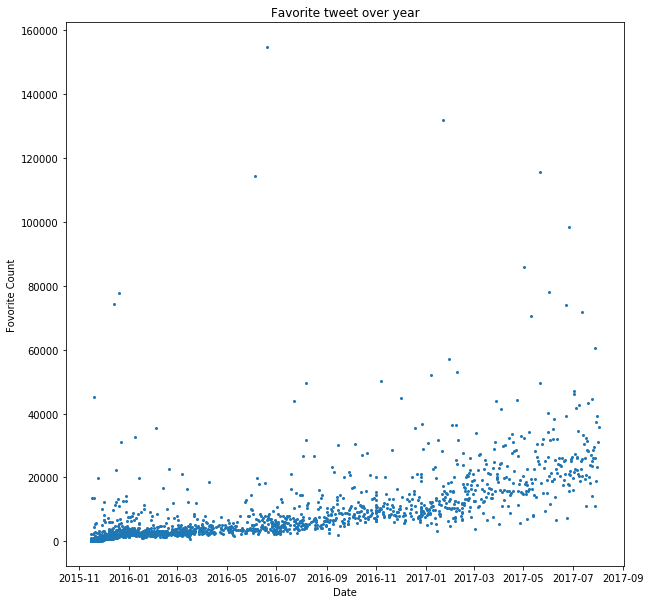

In [262]:
plt.figure(figsize = (10, 10))
plt.plot(df.timestamp,df.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite tweet over year')
plt.xlabel('Date')
plt.ylabel('Fovorite Count')
plt.show()

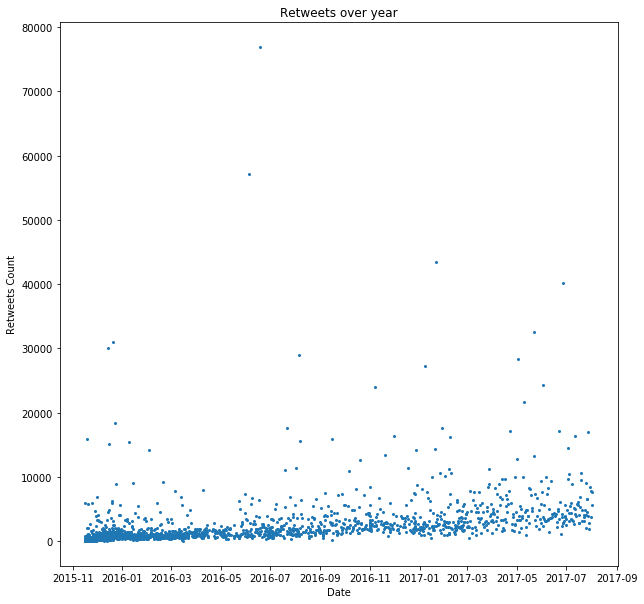

In [263]:
plt.figure(figsize = (10, 10))
plt.plot(df.timestamp,df.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Retweets over year')
plt.xlabel('Date')
plt.ylabel('Retweets Count')
plt.show()